# Inferencia Bayesiana

In [1]:
#| code-fold: true

import numpy as np
import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt

import preliz as pz

In [2]:
#| code-fold: true

az.style.use('arviz-doc')

Los objetivos de este capítulo son:

* Revisitar conceptos básicos de estadística Bayesiana
    * Qué implica hacer estadística Bayesiana
    * Interpretación de probabilidades en estadística Bayesiana
* Entender las distribuciones a priori, a posteriori, a priori predictiva y a posteriori predictiva 

## El universo Bayesiano

En este curso aprenderemos sobre una forma de hacer estadística llamada usualmente estadística Bayesiana. El nombre se debe a Thomas Bayes (1702-1761) un ministro presbiteriano, y matemático aficionado, quien derivó por primera vez lo que ahora conocemos como el **teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar métodos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez sería un poco más correcto hablar de _Estadística Laplaciana_ y no Bayesiana.


Hay dos ideas centrales que hacen que un método sea Bayesiano:


* Toda cantidad desconocida es modelada utilizando una distribución de probabilidad de algún tipo.
* El teorema de Bayes es usado para actualizar dicha distribución a la luz de los datos.


En el universo Bayesiano las cantidades conocidas son consideradas fijas y usualmente les llamamos **datos**. Por el contrario toda cantidad desconocida es considerada como una variable aleatoria y es considerada un **parámetros** dentro de un modelo Bayesiano.

### Teorema de Bayes

El teorema de Bayes es una consecuencia directa de la regla del producto, veamos.

\begin{align}
p(\theta, Y) = p(\theta \mid Y)\; p(Y) \\
p(\theta, Y) = p(Y \mid \theta)\; p(\theta)
\end{align}
Dado que los dos términos a la derecha de la igualdad son iguales entre si podemos escribir que:

$$
p(\theta \mid Y) \; p(Y) = p(Y \mid \theta)\; p(\theta)
$$

Reordenando llegamos al Teorema de Bayes!

$$
p(\theta \mid Y) = \frac{p(Y \mid \theta) p(\theta)}{p(Y)}
$$

El cual también suele ser escrito de la siguiente forma:

$$
\overbrace{p(\theta \mid Y)}^{\text{posterior}} = \frac{\overbrace{p(Y \mid \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{\int_{\Theta} p(Y \mid \theta) p(\theta) \text{d}\theta}_{\text{likelihood marginal}}}
$$

El **_a priori_** es la forma de introducir conocimiento previo sobre los valores que pueden tomar los parámetros. A veces cuando no sabemos demasiado se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los parámetros, otras veces se puede elegir _a prioris_ que restrinjan los valores de los parámetros a rangos razonables, algo que se conoce como regularización, por ejemplo solo valores positivos. Muchas veces contamos con información mucho más precisa como medidas experimentales previas o límites impuesto por alguna teoría.

El **_likelihood_** es la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estadística Bayesiana como en estadística no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez más peso en los resultados, esto explica el porqué a veces los resultados de la estadística Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

El **_a posteriori_** es la distribución de probabilidad para los parámetros. Es la consecuencia lógica de haber usado un conjunto de datos, un _likelihood_ y un _a priori_. Se lo suele pensar como la versión actualizada del _a priori_. De hecho un _a posteriori_ puede ser un _a priori_ de un análisis a futuro.

La **_likelihood marginal_** (también llamado _evidencia_) es el likelihood promediado sobre todas los posibles hipótesis (o conjunto de parámetros) $\theta$, esto es equivalente a $p(Y)$. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede (y suele) omitirse. Por lo que el teorema de Bayes suele aparecer escrito como:

$$
p(\theta \mid Y) \propto p(Y \mid \theta) p(\theta)
$$

El rol de todos estos términos irá quedando más claro a medida que avancemos.

### El _a posteriori_ como único estimador

El _a posteriori_ representa todo lo que sabemos de un problema, dado un modelo y un conjunto de datos. Y por lo tanto cualquier cantidad que nos interese sobre el problema puede deducirse a partir de él. Típicamente esto toma la forma de integrales como la siguiente.

$$
J = \int \varphi(\theta) \ \ p(\theta \mid Y) d\theta
$$

Por ejemplo, para calcular la media de $\theta$ deberíamos reemplazar $\varphi(\theta)$, por $\theta$:

$$
\bar \theta = \int \theta \ \ p(\theta \mid Y) d\theta
$$

Esto no es más que la definición de un promedio pesado, donde cada valor de $\theta$ es _pesado_ según la probabilidad asignada por el _a posteriori_.

En la práctica, y al usar métodos computacionales como los usados en este curso, estas integrales pueden aproximarse usando sumas.

### Estadística Bayesiana en tres pasos

El teorema de Bayes es el único estimador usado en estadística Bayesiana. Por lo que conceptualmente la estadística Bayesiana resulta muy simple. Según George Box y [Andrew Gelman et al. (2013)](https://www.crcpress.com/Bayesian-Data-Analysis-Third-Edition/Gelman-Carlin-Stern-Dunson-Vehtari-Rubin/p/book/9781439840955) la estadística Bayesiana se reduce a tres pasos:

1. **Crear un modelo probabilístico**. Los modelos probabilísticos son _historias_ que dan cuenta de como se generan los datos observados (o por observar). Los modelos se expresan usando distribuciones de probabilidad. 

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Usando el teorema de Bayes se actualizan las probabilidades asignadas _a priori_ de acuerdo a los datos observados obteniéndose las probabilidades _a posteriori_. 

3. **Criticar el ajuste del modelo generado a los datos y evaluar las consecuencias del modelo**. Se puede demostrar que dada la información previa y los datos observados no existe otro mecanismo capaz de generar una _mejor_ inferencia que la estadística Bayesiana. Esto parece maravilloso, pero hay un problema, sólo es cierto si se asumen que los datos y el modelo son correctos. En la práctica, los datos pueden contener errores y los modelos son _a duras penas_ aproximaciones de fenómenos _reales_. Por lo tanto es necesario realizar varias evaluaciones, incluyendo si las predicciones generadas por el modelo se ajustan a los datos observados, si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, la sensibilidad de los resultados a los _detalles_ del modelo (sobre todo a detalles para los cuales no tenemos demasiada información),  etc. Además, es posible que realizar inferencia Bayesiana sea demasiado costosa en la práctica por lo que sea conveniente realizar aproximaciones.

## Inferencia Bayesiana

En la práctica la mayoría de los modelos tendrán más de un parámetro, pero empecemos con un modelo con un solo parámetro.

### El problema de la moneda

A juzgar por la cantidad de ejemplos sobre monedas arrojadas al aires en libros de estadística y probabilidad, pareciera que las monedas son uno de los objetos de estudio centrales de estas disciplinas.

Una de las razones detrás de la ubiquidad de este ejemplo es que las monedas son objetos familiares que facilitan discutir conceptos que de otra forma podrían sonar demasiado abstractos. De todas formas quizá la razón más importante sea que el problema puede ser modelado de forma simple y que muchos problemas _reales_ son conceptualmente similares, de hecho cualquier problema en donde obtengamos resultados binarios (0/1, enfermo/sano, spam/no-spam, etc) puede ser pensado como si estuviéramos hablando de monedas. En definitiva el modelo que veremos a continuación (ejemplificado con monedas) sirve para cualquier situación en la cual los datos observados solo pueden tomar dos valores mutuamente excluyentes. Debido a que estos valores son nominales y son dos, a este modelo se le llama binomial.

En el siguiente ejemplo trataremos de determinar el grado en que una moneda está sesgada. En general cuando se habla de sesgo se hace referencia a la desviación de algún valor (por ejemplo, igual proporción de caras y cecas), pero aquí usaremos el termino _sesgo_ de forma más general. Diremos que el sesgo es un valor en el intervalo [0, 1], siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos una moneda al aire repetidas veces, por practicidad arrojaremos la moneda de forma computacional (¡pero nada nos impide hacerlo manualmente!). Llevaremos registro del resultado en la variable $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Habiendo definido nuestro problema debemos expresarlo en términos del teorema de Bayes,

$$
p(\theta \mid Y) \propto p(Y \mid  \theta) p(\theta)
$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.

Ahora sólo restar reemplazar los dos términos a la derecha de la igualdad, el _a priori_ y el _likelihood_,  por distribuciones de probabilidad _adecuadas_ y luego multiplicarlas para obtener el término a la izquierda, el _a posteriori_. Como es la primera vez que haremos ésto, lo haremos paso a paso y analíticamente. En el próximo capítulo veremos cómo hacerlo computacionalmente.

### Definiendo el _a priori_

El _a priori_ lo modelaremos usando una distribución Beta, que es una distribución muy usada en estadística Bayesiana. La $pdf$ de esta distribución es:

$$
p(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

El primer término es una constante de normalización. Por suerte para nuestro problema nos basta con establecer una proporcionalidad, por lo que podemos simplificar esta expresión y escribir la distribución Beta de la siguiente forma.

$$
p(\theta) \propto  \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Hay varias razones para usar una distribución Beta para este y otros problemas:

* La distribución Beta varía entre 0 y 1, de igual forma que lo hace $\theta$ en nuestro modelo.
* Esta distribución combinada con la que elegiremos como _likelihood_ (ver más adelante), nos permitirá resolver el problema de forma analítica.
* Es una distribución versátil para expresar distintas situaciones. 

Respecto al último punto, veamos un ejemplo. Supongamos que el experimento de la moneda es realizado por tres personas. Una de ellas dice no saber nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente probables. La segunda persona desconfía de la moneda, ya que sospecha que es una moneda trucada, por lo tanto considera que está sesgada, pero no sabe para cual de las dos opciones. Por último, la tercer persona asegura que lo más probable es que $\theta$ tome un valor alrededor de 0.5 ya que así lo indican experimentos previos y análisis teóricos sobre tiradas de monedas. Todas estas situaciones pueden ser modeladas por la distribución Beta, como se ve a continuación.

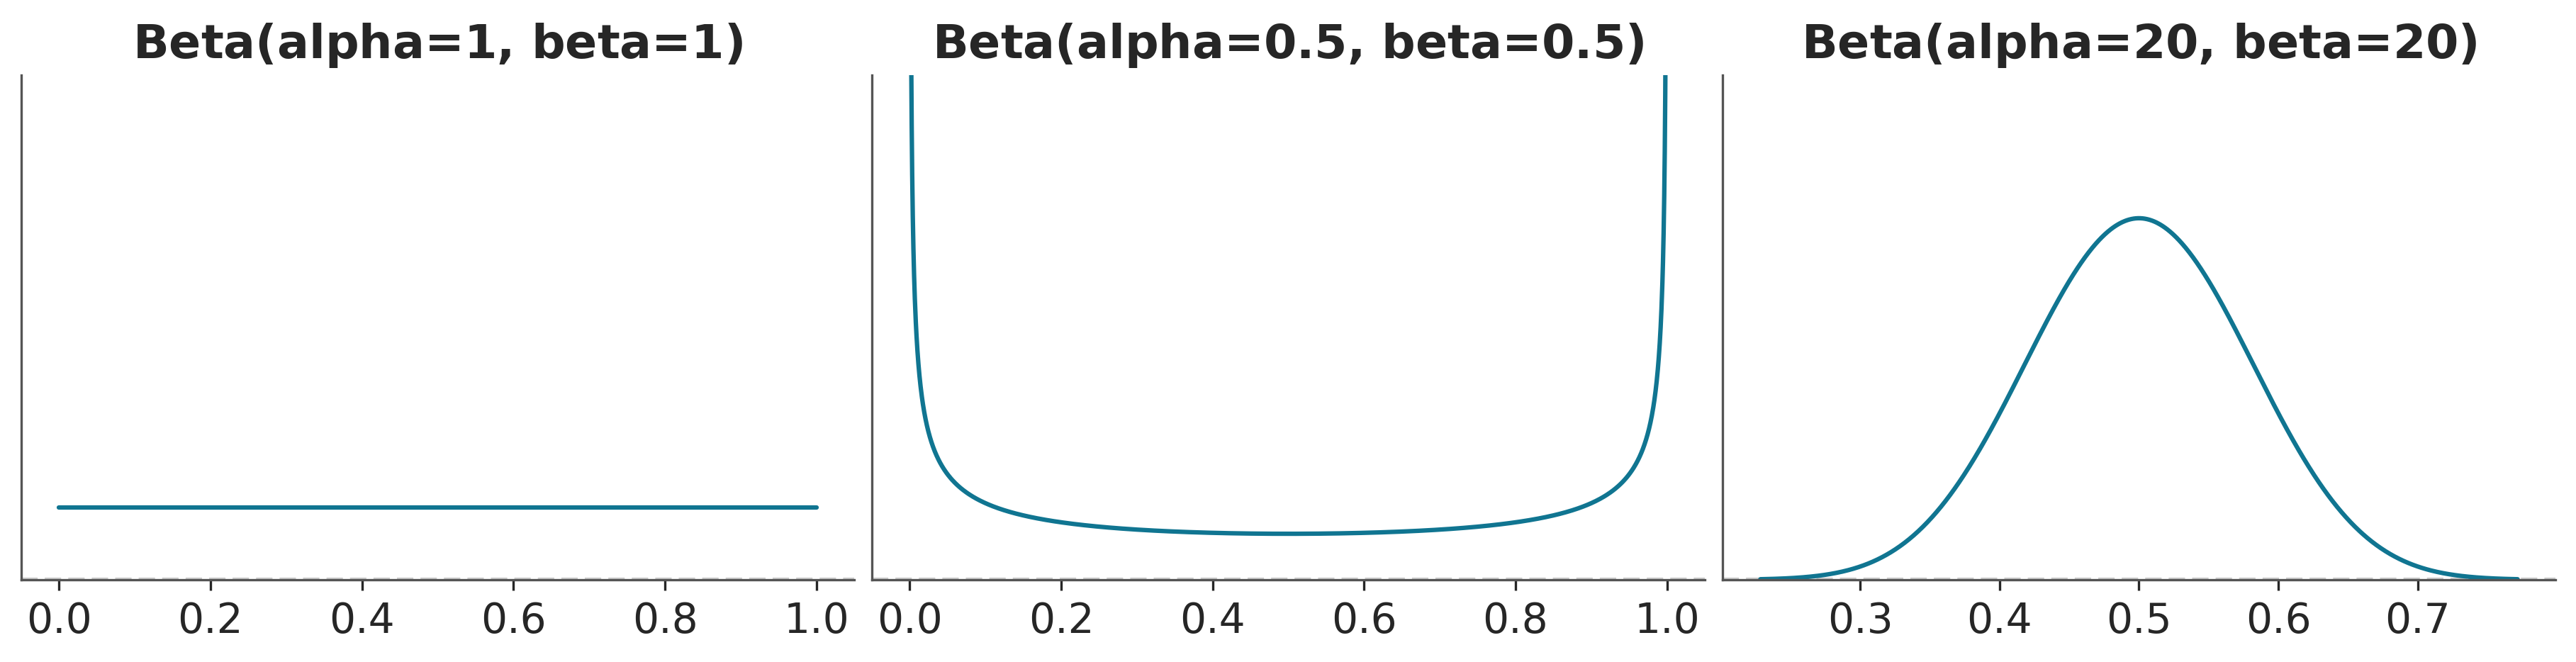

In [3]:
_, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

params = [(1, 1), (0.5, 0.5), (20, 20)]

for (a, b), ax  in zip(params, axes):
    ax = pz.Beta(a, b).plot_pdf(ax=ax, legend="title")
    ax.set_ylim(0, 7)

In [4]:
pz.Beta().plot_interactive(xy_lim=(None, None, None, 10))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

###  Definiendo el _likelihood_

Habiendo definido el _a priori_ veamos ahora el likelihood. Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre sí) es razonable utilizar como likelihood la distribución binomial.

$$
p(y \mid \theta) = \frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N−y}
$$

Donde N es la cantidad total de experimentos (monedas arrojadas al aire) e $y$ es la cantidad de caras obtenidas. A los fines prácticos podríamos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el término $\frac{N!}{y!(N-y)!}$ ya que ese término no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podríamos establecer que:

$$
p(y \mid \theta) \propto \theta^y (1 - \theta)^{N−y}
$$

La elección de esta distribución para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener ceca lo cual ha sido observado $N-y$ veces.

In [5]:
pz.Binomial(1, 0.5).plot_interactive(pointinterval=False, xy_lim=(None, None, None, 1))

interactive(children=(IntSlider(value=1, description='n (0, inf)', max=11, style=SliderStyle(description_width…

### Obteniendo el _a posteriori_

Se puede demostrar que siempre que usemos como _prior_ una función Beta y como _likelihood_ una distribución binomial obtendremos como resultado una distribución _a posteriori_, la cual será una Beta con los siguientes parámetros:

$$
p(\theta \mid y) = \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)
$$

Veamos de donde surge este resultado, según el teorema de Bayes la distribución _a posteriori_ es el producto del _likelihood_ y la distribución _a priori_.

$$
p(\theta \mid y) = p(y \mid \theta) p(\theta) * c
$$

Por lo tanto, en nuestro caso tendremos que:

$$
p(\theta \mid y) \propto \underbrace{{\color{gray}{\frac{N!}{y!(N-y)!}}} \theta^y (1 - \theta)^{N−y}}_{\text{likelihood}} \underbrace{{\color{gray}{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}}}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}}_{\text{prior}}
$$

Si omitimos las constantes de normalizando del likelihood y prior, obtenemos que el _a posteriori_ es:

$$
p(\theta \mid y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N−y}
$$

Podemos ver que la expresión a la derecha de la proporcionalidad tiene la misma forma funcional (sin considerar la constante de proporcionalidad) que una distribución Beta. Como la distribución a posterior debe intergrar a 1 entonces podemos escribir.

$$
p(\theta \mid y) = \frac{\Gamma(\alpha + y +\beta + N -y)}{\Gamma(\alpha + y)\Gamma(\beta + N - y)}\, \theta^{\alpha-1+y}(1-\theta)^{\beta-1+n-y}
$$

Lo que es equivalente a una distribución Beta con parámetros $\alpha_{\text{a posteriori}} = \alpha_{\text{a priori}} + y \quad \beta_{\text{a posteriori}} = \beta_{\text{a priori}} + N - y$.

Cuando se cumple que para un cierto _likelihood_ la forma funcional del _a priori_ y la del _a posteriori_ coinciden se dice que el _a priori_ es conjugado con el _likelihood_. Históricamente los problemas en estadística Bayesiana estuvieron restringidos al uso de _a prioris_ conjugados, ya que estos garantizan la tratabilidad matemática del problema, es decir garantizan que es posible obtener una expresión analítica para nuestro problema. En el próximo capítulo veremos técnicas computacionales modernas que permiten calcular la distribución _a posteriori_ incluso cuando no se usan _a prioris_ conjugados. Estas técnicas computacionales han permitido el resurgimiento de la estadística Bayesiana en las últimas décadas.

### Notación y visualización de modelos Bayesianos

Para representar modelos en estadística Bayesiana (y en probabilidad en general) se suele utilizar la siguiente notación

$$
\begin{align}
\theta \sim & \operatorname{Beta}(\alpha, \beta) \\
Y \sim & \operatorname{Bin}(n=1, p=\theta)
\end{align}
$$

El símbolo $\sim$ indica que la variable a la izquierda se distribuye según la distribución a la derecha. Entonces podríamos decir que $\mathbf{\theta}$ es una variable aleatoria con distribución $\operatorname{Beta}$, y que $\operatorname{Beta}$ está definida por los parámetros $\alpha$ y $\beta$, este es nuestro _a priori_. En la siguiente línea tenemos el _likelihood_ el cual está definido por una distribución binomial con parámetros $n=1$ y $p=\theta$.

Gráficamente esto se puede representar usando los diagramas de Kruschke:

<center>
<img src="img/modelo_1_moneda.png" width=400>

En el primer nivel (de arriba hacia abajo) se observa el _a priori_, luego el likelihood, y por último los datos. Las flechas indican la vinculación entre las partes del modelo y el signo $\sim$ la naturaleza estocástica de las variables.

###  Obteniendo los datos

Bien, ahora que sabemos cómo calcular el *a posteriori*, lo único que resta es conseguir los datos. En este ejemplo los datos son sintéticos, es decir los obtuve computacionalmente mediante un generador de números (pseudo)aleatorios, pero bien podrían haber surgido de un experimento con una moneda *real*.

### Calculando el _a posteriori_

En el próximo capítulo veremos cómo usar métodos computacionales para computar un _a posteriori_ sin necesidad de derivarlo analíticamente. Esto es lo que haremos para resolver el resto de los problemas del curso. Pero dado que ya nos tomamos el trabajo de derivar analíticamente la expresión para el _a posteriori_ vamos a usar esa expresión. Si miran el código de la siguiente celda verán que la mayoría de las lineas se encargan de dibujar los resultados y no de calcularlos. El cálculo del _a posteriori_ ocurre en la línea 20. Cada una de estas lineas computa el _a posteriori_ para cada uno de los _a prioris_ que vimos antes. El cálculo es simple, tan solo se computa el valor del _a posteriori_ (usando la función _pdf_ de la distribución Beta provista por PreliZ) para 2000 puntos igualmente espaciados entre 0 y 1 (linea 9). El loop que empieza en la linea 11 se debe a que exploraremos cómo cambian las distribuciones _a posteriori_ para distinta cantidad de datos (*n_intentos*). Con un círculo negro de contorno blanco se indica el valor real de $\theta$, valor que por supuesto es desconocido en una situación real, pero conocido para mí, ya que los datos son sintéticos.

c:\Users\admin\Desktop\unsam\Ciencia_de_Datos\Estadistica e Inferencia 2\estadistica_e_inferencia_II\.venv\Lib\site-packages\numba\np\ufunc\dufunc.py:287: RuntimeWarning: divide by zero encountered in nb_logpdf
  return super().__call__(*args, **kws)


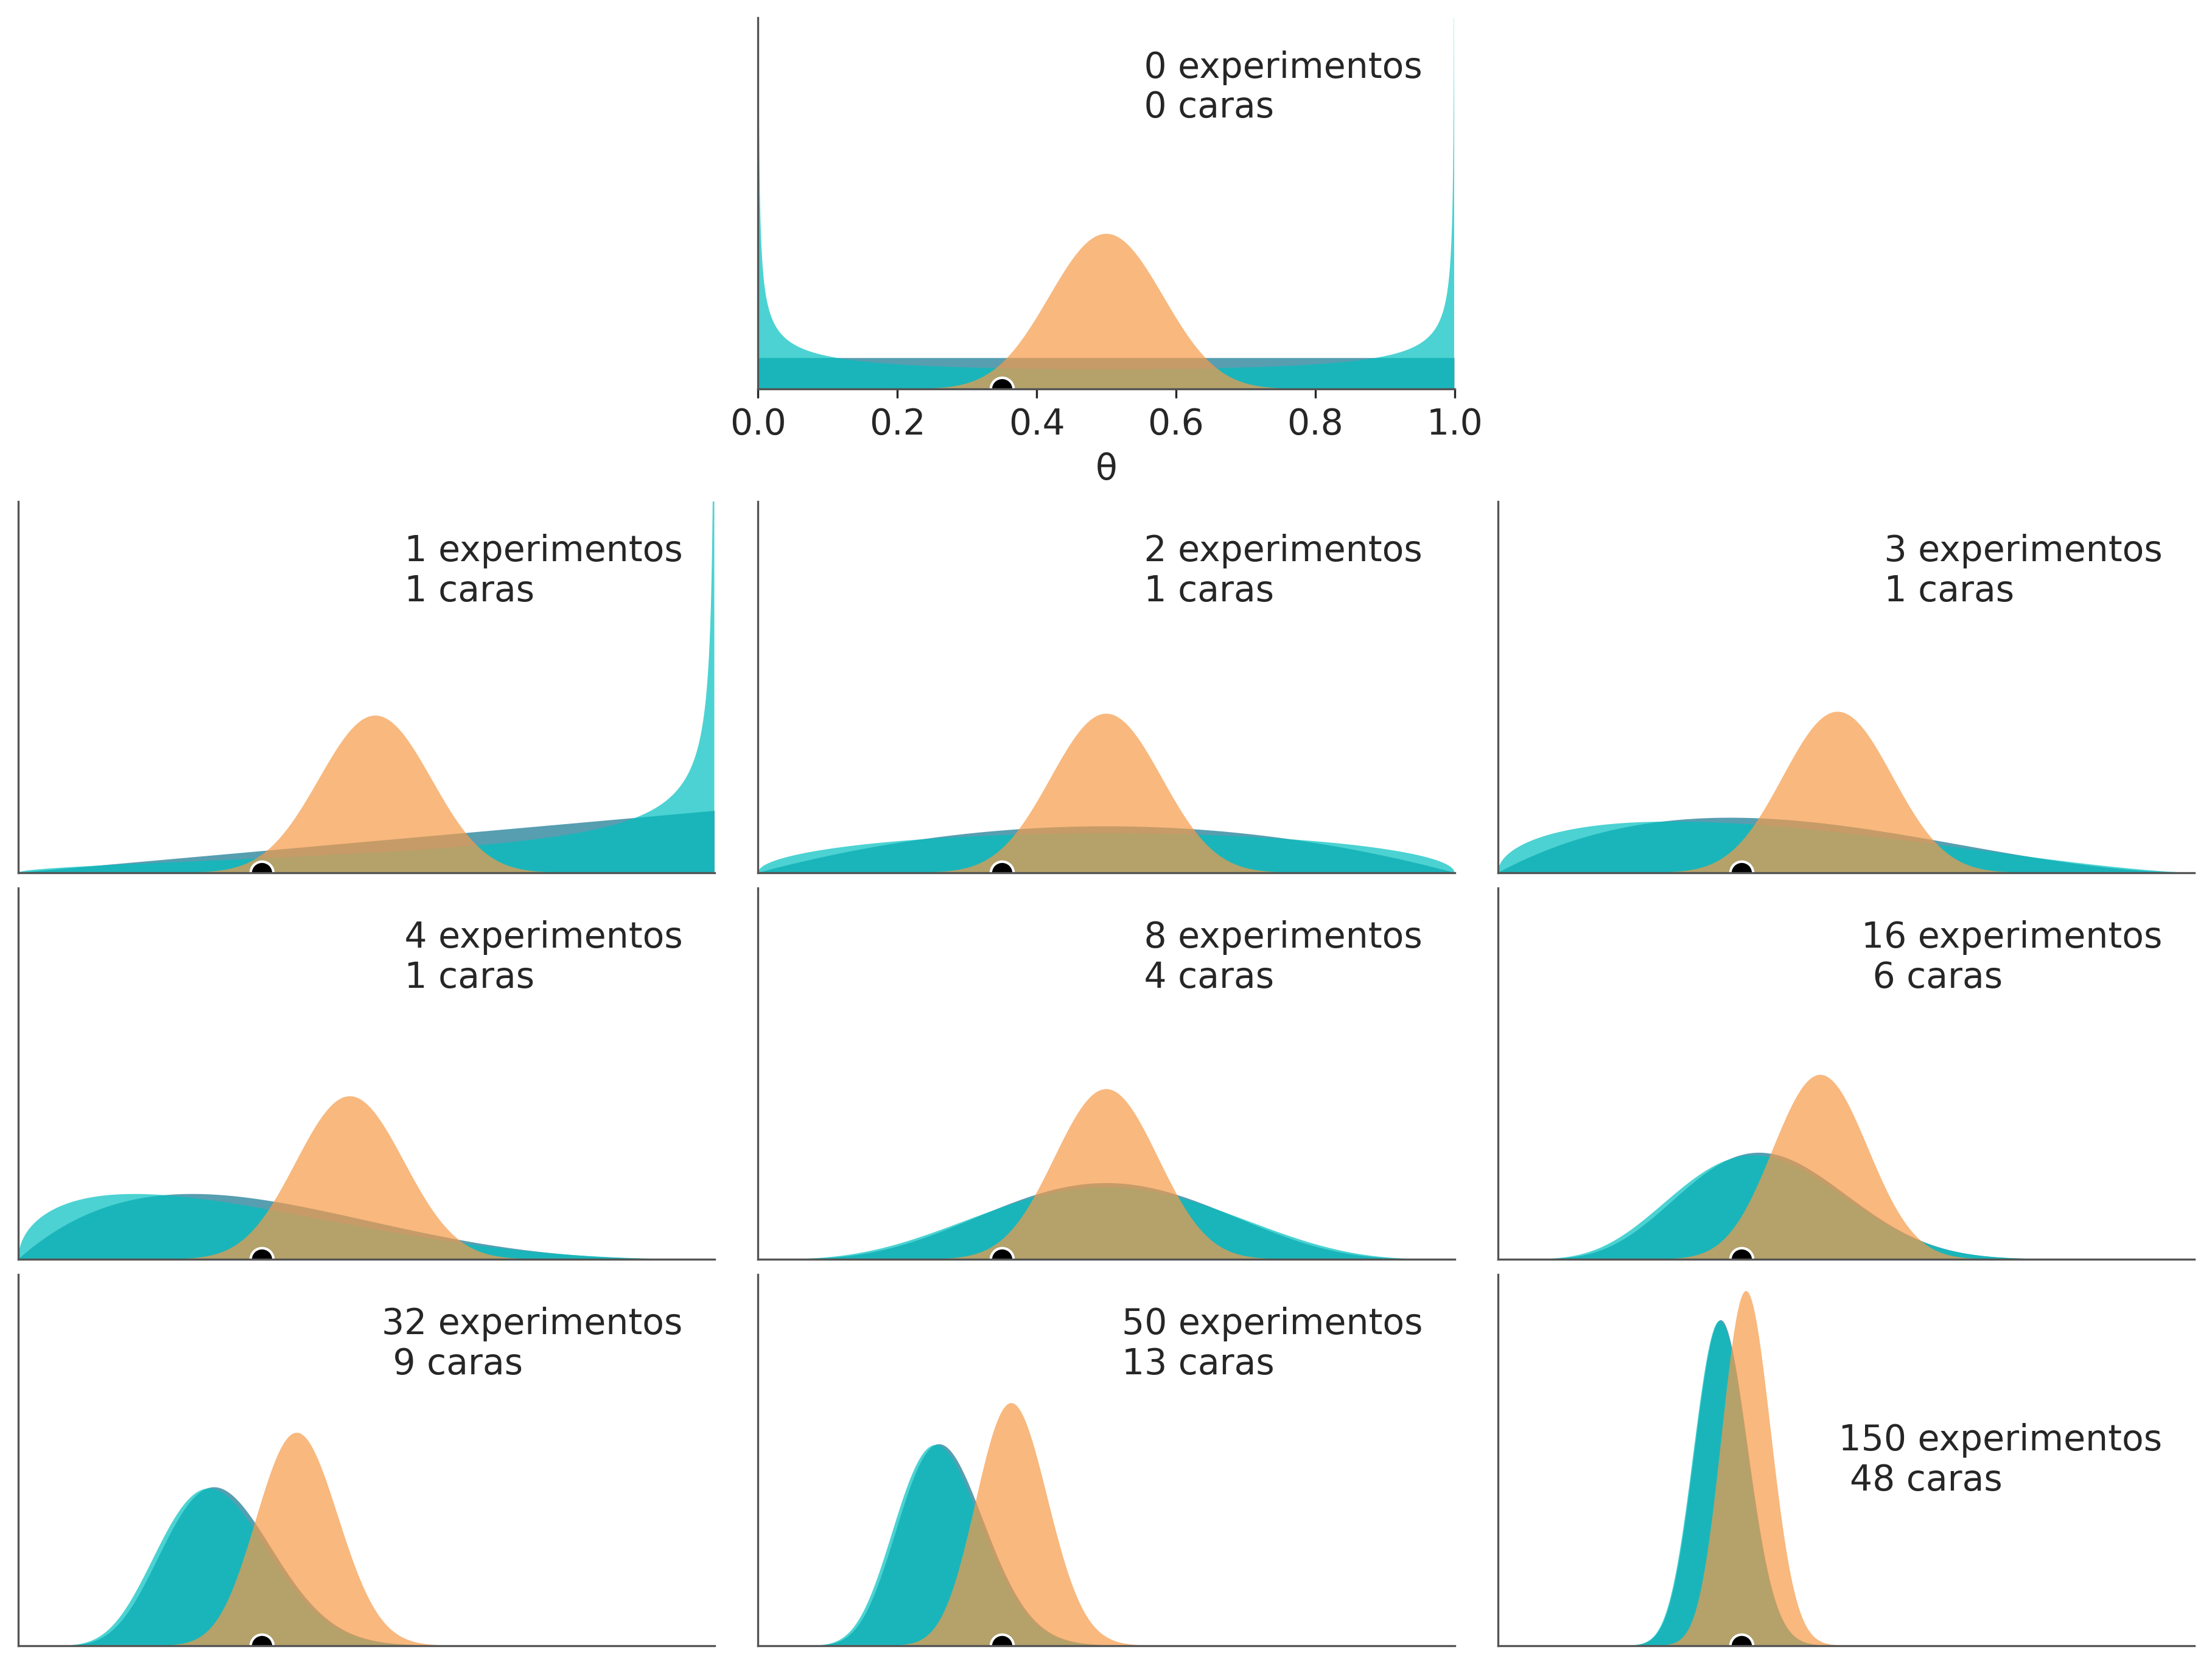

In [6]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

## Analizando los resultados

La primer figura del panel muestra los *a priori*, nuestra estimación de $\theta$ dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestran las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas. Además se puede ver un círculo negro de contorno blanco en 0.35, la cual representa el valor verdadero de $\theta$. Por supuesto que en problemas reales este valor es desconocido.

Este ejemplo es realmente ilustrativo en varios aspectos.

* El resultado de un análisis Bayesiano NO es un solo valor, si no una distribución (_a posteriori_) de los valores plausibles de los parámetros (dado los datos y el modelo).
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores.
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución).
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado.
* La rapidez con la que los resultados convergen varía. En este ejemplo las curvas azul y turquesa parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 150 experimentos se observan ligeras diferencias.
* Partiendo de los _a priori_ uniforme (azul) o _sesgado_ (turquesa) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drásticamente al ver por primera vez una moneda caer ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que $\theta=0.5$. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El _a priori_ naranja es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo".
* El _a priori_ uniforme (azul) es lo que se conoce como no informativo. El resultado de un análisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).

###  Influencia y elección del _a priori_

De los ejemplos anteriores debería quedar claro que los _a priori_ influencian los resultados de nuestros cálculos. Esto tiene total sentido si no fuese así no haría falta incluirlos en el análisis y todo sería más simple (aunque nos perderíamos la oportunidad de usar información previa). De los ejemplos anteriores también debería quedar claro que a medida que aumentan los datos (como las tiradas de monedas) los resultados son cada vez menos sensibles al _a priori_. De hecho, para una cantidad infinita de datos el _a priori_ no tiene ningún efecto. Exactamente cuantos datos son necesarios para que el efecto del _a priori_ sea despreciable varía según el problema y los modelos usados. En el ejemplo de la moneda se puede ver que 50 experimentos bastan para hacer que dos de los resultados sean prácticamente indistinguibles, pero hacen falta más de 150 experimentos para que los 3 resultados se vuelvan _practicamente_ independientes del _a priori_. Esto es así por que los dos primeros _a prioris_ son relativamente _planos_, mientras que el tercer _a priori_ concentra casi toda la probabilidad en una región relativamente pequeña. El tercer a priori no solo considera que el valor más probable de $\theta$ es 0.5, si no que considera que la mayoría de los otros valores son muy poco probables. ¿Cómo cambiarían los resultados si hubiéramos usado como _a priori_ $\operatorname{Beta}(\alpha=2, \beta=2)$?

La elección de los _a priori_ puede poner nervioso a quienes se inician en el análisis Bayesiano (o a los detractores de este paradigma). ¡El temor es que los _a prioris_ censuren a los datos y no les permitan _hablar por sí mismos_! Eso está muy bien, pero el punto es que los datos no saben hablar, con suerte murmuran. Los datos solo tienen sentido a la luz de los modelos (matemáticos y mentales) usados para interpretarlos, y los _a prioris_ son parte de esos modelos. 

Hay quienes prefieren usar _a priori_ no-informativos (también conocidos como _a priori_ planos,
vagos, o difusos). Estos _a priori_ aportan la menor cantidad posible de información y por lo tanto tienen el menor impacto posible en el análisis. Si bien es posible usarlos, en general hay razones prácticas para no preferirlos. En este curso usaremos _a priori ligeramente informativos_ siguendo las recomendaciones de Gelman, McElreath, Kruschke, y otros. En muchos problemas sabemos al menos algo de los valores posibles que pueden tomar nuestros parámetros, por ejemplo que solo pueden ser positivos, o que están restringidos a sumar 1 o el rango aproximado, etc. En esos casos podemos usar _a prioris_ que introduzcan esta _ligera_ información. En estos casos podemos pensar que la función del _a priori_ es la de mantener las inferencias dentro de límites razonables. Estos _a priori_ se suelen llamar regularizadores.


Por supuesto que también es posible usar _a prioris informativos_ (o _fuertes_). Hacer esto es razonable solo si contamos con información previa confiable. Esto puede ser ventajoso en casos en que los datos contengan poca información sobre el problema. Si la información no viene por el _likelihood_ (datos), entonces puede venir por el _a priori_. A modo de ejemplo, en bioinformática estructural es común usar toda la información previa posible (de forma Bayesiana y no-Bayesiana) para resolver problemas. Esto es posible por la existencia de bases de datos que almacenan los resultados de cientos o miles experimentos realizados a lo largo de décadas de esfuerzo (¡No usar esta información sería casi absurdo!). En resumen, si contás con información confiable no hay razón para descartarla, menos si el _argumento_ es algo relacionado con pretender ser _objetivo_ (¡No hay objetividad en negar lo que se sabe!).

Hasta ahora hemos visto que es posible clasificar, aunque sea de forma vaga o aproximada, a los _a priori_ en función de la información que contienen. Pero saber esta clasificación no necesariamente hace las cosas más simples a la hora de elegir un _a priori_. ¿Acaso no sería mejor eliminar los _a prioris_ de nuestro análisis? Eso haría el asunto mucho mas simple. Bueno, el punto es que desde una perspectiva Bayesiana todos los modelos tienen _a prioris_, aun cuando no sean explícitos. De hecho muchos resultados de la estadística frecuentista pueden considerarse casos especiales de modelos Bayesianos usando _a prioris planos_. Volviendo a la figura anterior se puede ver que la moda del _a posteriori_ para la curva azul. Coincide con la estimación (puntual) frecuentista para el valor de $\theta$

$$
\hat \theta = {{y} \over {N}}
$$

Notar que $\hat \theta$ es una estimación puntual (un número) y no una distribución.

Este ejemplo nos muestra que no es posible hacer análisis estadísticos y sacarse los _a prioris_ de encima. Un posible corolario es que es más flexible y transparente especificar los _a prioris_ de forma explícita que esconderlos bajo la cama. Al hacerlo ganamos mayor control sobre nuestro modelo, mayor transparencia y por el mismo precio la estimación de la incertidumbre con la que se estima cada parámetro.

Por último, hay que recordar que el modelado estadístico (como otras formas de modelado) es un proceso iterativo e interactivo. Nada nos impide usar más de un _a priori_ (o un likelihood) si así lo quisiéramos. Una parte importante del modelado es la de cuestionar los supuestos y los _a prioris_ son simplemente un tipo de supuestos (como lo son los _likelihoods_). Si tuviéramos más de un _a priori_ razonable podríamos realizar un _análisis de sensibilidad_, es decir evaluar como cambian los resultados con los _a prioris_, podríamos llegar a la conclusión que para un rango amplio de _a prioris_ ¡los resultados no varían! Más adelante veremos varias herramientas para comparar distintos modelos.

Dado que los _a prioris_ tienen un papel central en la estadística Bayesiana, seguiremos discutiéndolos a medida que vayamos viendo problemas concretos. Por lo que si esta discusión no ha aclarado todas tus dudas y seguís algo confundido, mejor mantener la calma y no preocuparse demasiado, este tema ha sido motivo de discusión y confusión durante décadas ¡y la discusión todavía continua!

### Cuantificando el peso del _a priori_

En general la distribución más familiar para la mayoría de las personas es la distribución Gaussiana, como esta distribución está definida por dos parámetros, la media y la dispersión de ese valor medio, suele resultarnos _natural_ pensar las distribuciones en esos términos. Además, resulta relativamente sencillo (o al menos más sencillo que otras alternativas) pensar en un valor medio y una desviación o ruido simétrico alrededor de esa media.

Si queremos expresar la distribución Beta en función de la media y la dispersión podemos hacerlo de la siguiente forma:

\begin{align}
\alpha &= \mu \kappa \\
\beta &= (1 - \mu) \kappa
\end{align}

donde $\mu$ es la media y $\kappa$ es un parámetro llamado concentración. Por ejemplo si $\mu=0.5$ y $\kappa=40$, tenemos que:

\begin{align}
\alpha = 0.5 \times 40 &= 20 \\
\beta = (1-0.5) \times 40 &= 20
\end{align}

$\kappa$ se puede interpretar como la cantidad de experimentos si/no que realizamos dándonos como resultado la media $\mu$. Es decir el _a priori_ no sesgado (naranja) equivale a haber arrojado una moneda 40 veces y haber obtenido como media 0.5. Es decir que si usamos ese _a priori_ recién al observar 40 experimentos si/no, los datos tendrán el mismo peso relativo que el _a priori_, por debajo de este número el _a priori_ contribuye más que los datos al resultado final y por encima menos. El _a priori_ azul (uniforme) equivale a haber observado a la moneda caer una vez cara y otra vez ceca ($\kappa = 2$). Cuando $\kappa < 2$, la cosa se pone un poco extraña, por ejemplo el _a priori_ sesgado (turquesa) equivale a haber observado una sola moneda ($\kappa = 1$) pero en una especie de, a falta de mejor analogía, ¡¿_superposición cuántica de estados_?!

### Resumiendo el  _a posteriori_

El resultado de un análisis Bayesiano es siempre una distribución de probabilidad.

A la hora de comunicar los resultados de un análisis Bayesiano, lo más informativo es reportar la distribución completa, aunque esto no siempre es posible o deseable, por ejemplo el _a posteriori_ de una distribución multidimensional es imposible de visualizar de forma directa. Por lo tanto, es común recurrir a distintas medidas que resumen el _a posteriori_, por ejemplo la media, mediana, la desviación estándar, etc. También es común, e informativo, reportar un intervalo de credibilidad. Existen varios criterios para definir intervalos de credibilidad, el que usaremos en este curso (y que también es ampliamente usado en la literatura) es lo que se conoce como intervalo de más alta densidad y nos referiremos a él por su sigla en ingles, HDI (_Highest Posterior Density interval_). Un HDI es el intervalo, más corto, que contiene una porción fija de la densidad de probabilidad, generalmente el 95% (aunque otros valores como 90% o 50% son comunes). Cualquier punto dentro de este intervalo tiene mayor densidad que cualquier punto fuera del intervalo. Para una distribución unimodal, el HDI 95 es simplemente el intervalo entre los percentiles 2,5 y 97,5.

ArviZ es un paquete de Python para análisis exploratorio de modelos Bayesianos. ArviZ provee de funciones que facilitan analizar y resumir el _a posteriori_. Por ejemplo `plot_posterior` puede ser usado para generar un gráfico con la media y el HDI. En el siguiente ejemplo en vez de un _a posteriori_ "real" estamos usando datos sintéticos generados de una distribución Beta.

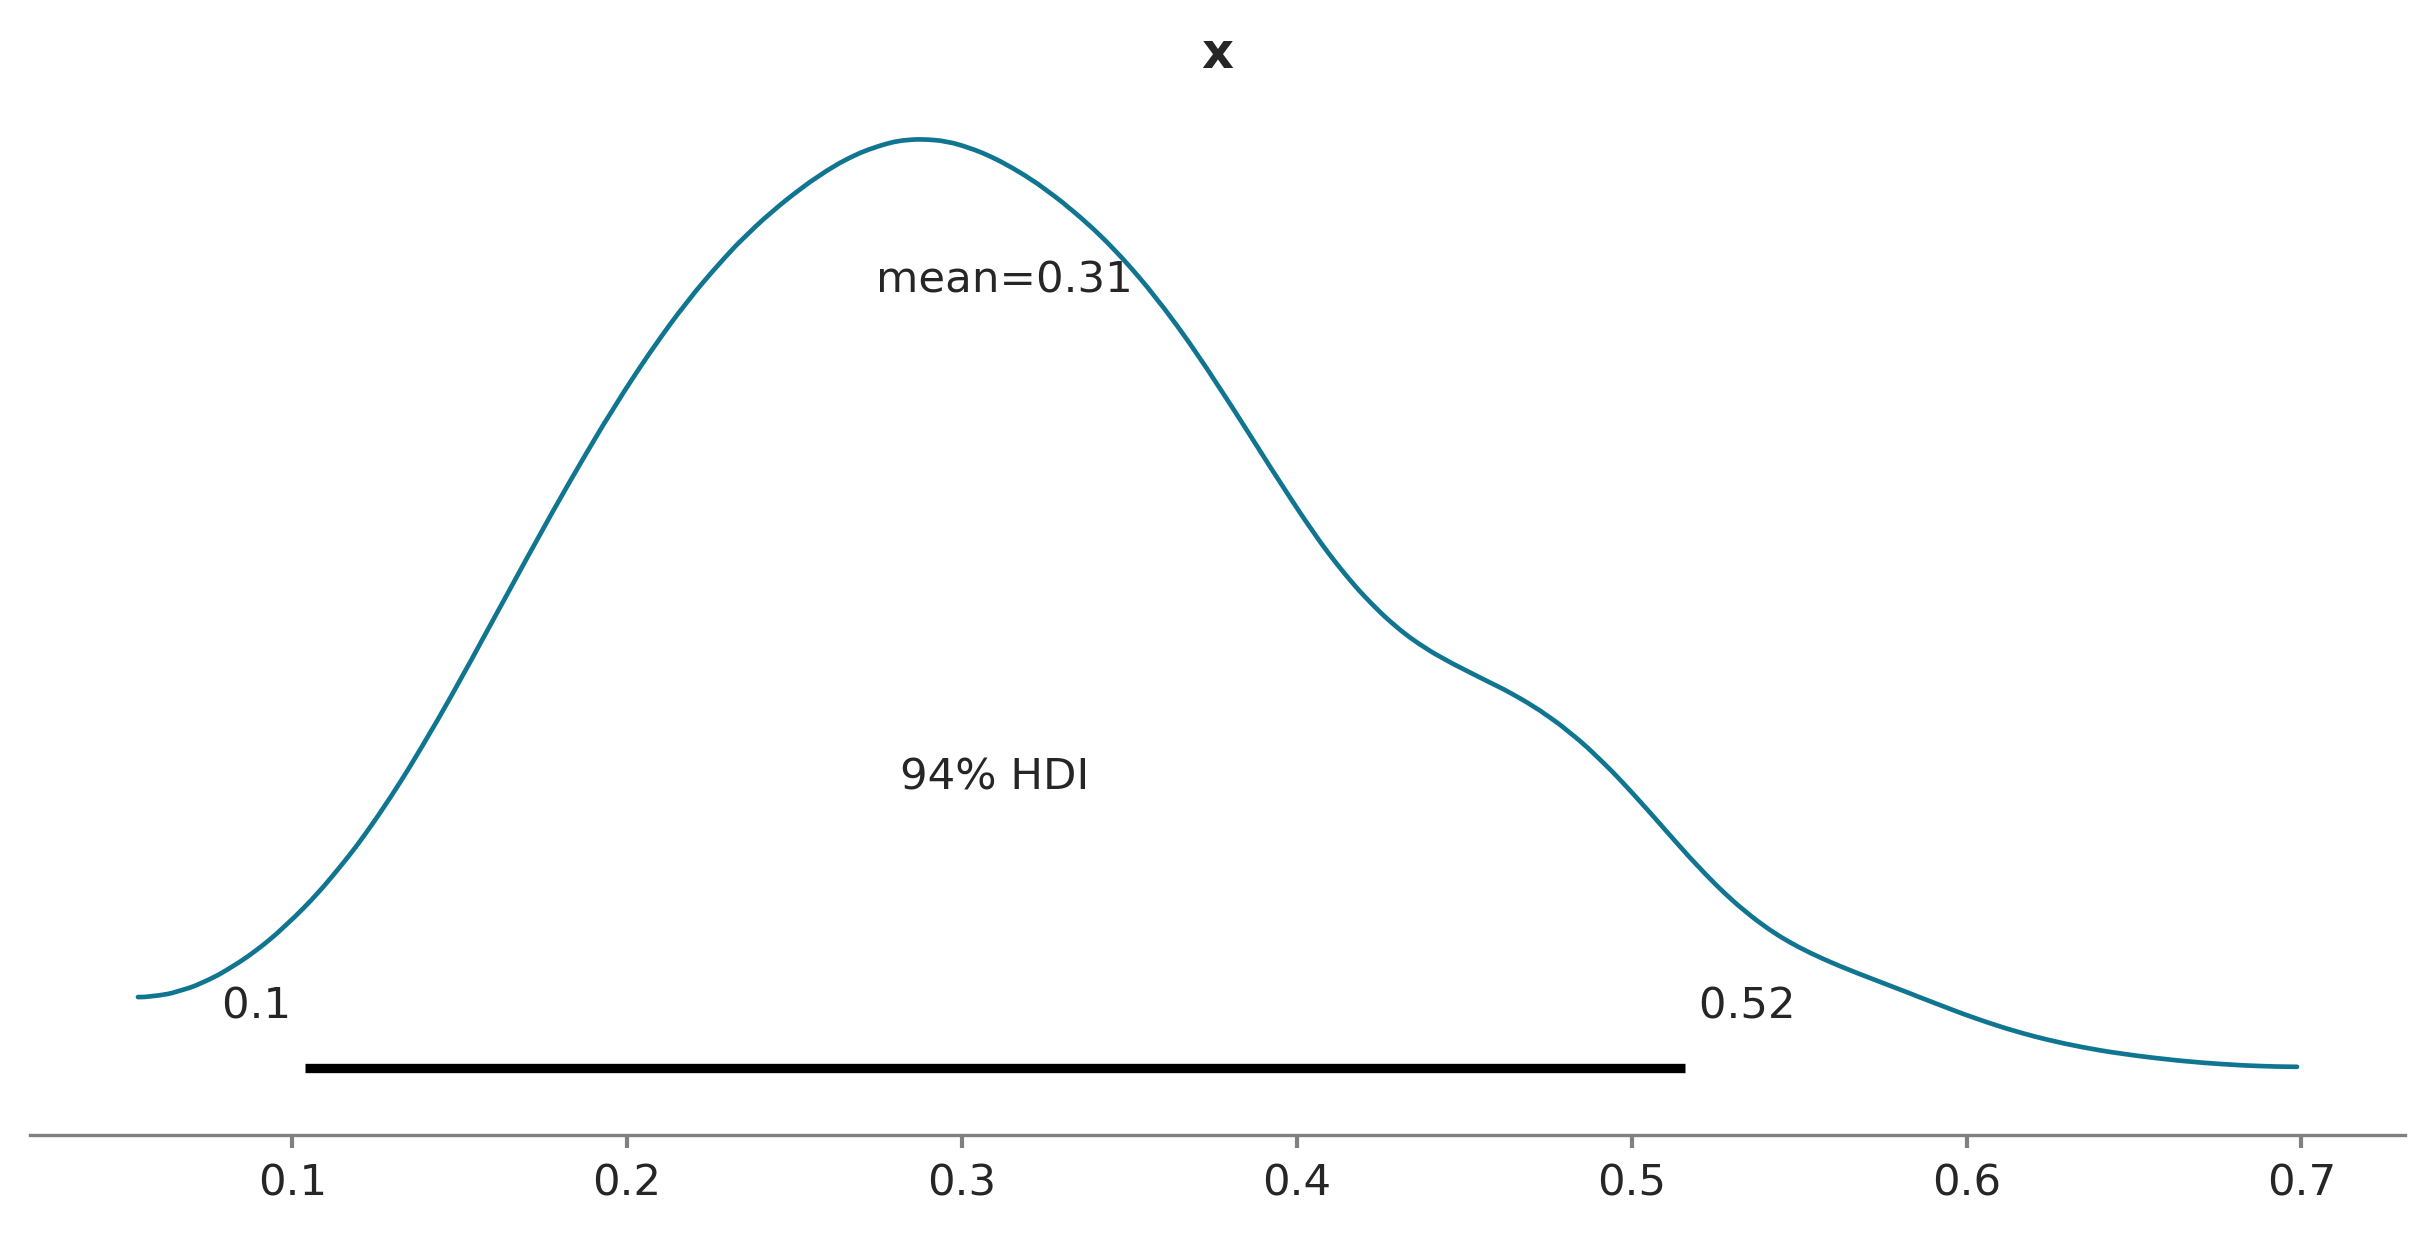

In [6]:
mock_posterior = pz.Beta(5, 11).rvs(size=1000)
az.plot_posterior(mock_posterior, figsize=(8, 4));

Ahora que estamos aprendiendo que es un HDI por primera vez y antes de que automaticemos el concepto conviene aclarar un par de puntos. 

1. **La elección automática de 95% (o cualquier otro valor) es totalmente arbitraria**. En principio no hay ninguna razón para pensar que describir el _a posteriori_ con un HDI 95 sea mejor que describirlo con un HDI 98 o que no podamos usar valores como 87% o 66%. El valor de 95% es tan solo un accidente histórico. Como un sutil recordatorio de esto ArviZ usa por defecto el valor 94%!

2. **Un intervalo de credibilidad (que es Bayesiano) no es lo mismo que un intervalo de confianza (que es frecuentista)**. Un intervalo de confianza es un intervalo que se define según un nivel de confianza, en general del 95%. Un intervalo de confianza se construye de tal forma que si repitiéramos infinitas veces un experimento obtendríamos que la proporción de intervalos que contienen el valor _verdadero_ del parámetro que nos interesa coincide con el nivel de confianza estipulado. Contra-intuitivamente esto no es lo mismo que decir que un intervalo en particular tiene una probabilidad $x$ de contener el parámetro (esto sería la definición de un intervalo de credibilidad, que es Bayesiano). De hecho, un intervalo de confianza en particular contiene o no contiene al valor, la teoría frecuentista no nos deja hablar de probabilidades de los parámetros, ya que estos tienen valores fijos. Si no queda clara la diferencia no te hagas problema, la diferencia entre estos dos conceptos suele ser tan difícil de entender que en la práctica estudiantes y científicos por igual interpretan los intervalos de confianza (frecuentistas) como intervalos de credibilidad (Bayesianos). 

> Si bien desde la perspectiva Bayesiana podemos afirmar que un intervalo de credibilidad nos permite asegurar que la probabilidad de un parámetro está acotado en cierto rango. Siempre hay que tener presente que dicha afirmación es correcta SOLO en sentido teórico. Es decir, solo si todos los supuestos contenidos en el modelo son ciertos. Una inferencia es siempre dependiente de los datos y modelos usados.

## Distribución predictivas 

Si bien el objeto central de la estadística Bayesiana es la distribución _a posteriori_. Existen otras distribuciones muy importantes. Una de ellas es la distribución predictiva _a posteriori_, otra es la distribución predictiva _a priori_. 


### Distribución predictivas  _a posteriori_


Esta distribución representa las predicciones $\tilde{y}$ de un modelo una vez obtenido el _a posteriori_. Se calcula de la siguiente manera:

$$
p(\tilde{y}  \mid  y) = \int p(\tilde{y} \mid \theta) p(\theta \mid y) d\theta 
$$

Es decir integramos $\theta$ de acuerdo a la distribución _a posteriori_. 

Computacionalmente podemos generar muestras de esta distribución según el siguiente procedimiento:

1. Elegimos un valor de $\theta$ de acuerdo a la distribución a posteriori $p(\theta \mid y)$
2. Fijamos $\theta$ en la distribución que usamos como likelihood $p(\tilde{y} \mid \theta)$ y generamos una muestra aleatoria
3. Repetimos desde 1, tantas veces como muestras necesitemos

Los datos generados son predictivos ya que son los datos que se esperaría ver por ejemplo en un futuro experimento, es decir son variables no observadas pero potencialmente observables. Como veremos en el siguiente capítulo un uso muy común para la distribución predictiva _a posteriori_ es compararla con los datos observados y así evaluar si el posterior calculado es razonable.

### Distribución predictiva _a priori_

Asi como es posible generar datos sintéticos desde el _a posteriori_. Es posible hacerlo desde el prior. En este caso la distribución se llama distribución predictiva _a priori_. Y representa los datos $p(y^\ast)$ que el modelo *espera* ver antes de haber visto los datos. O más formalmente antes de haber sido condicionado a los datos. Se calcula como:

$$
p(y^\ast) =  \int p(y^\ast \mid \theta) \; p(\theta) \; d\theta
$$

Es importante notar que la definición es muy similar a la distribución predictiva a posteriori, solo que ahora integramos a lo largo del prior en vez del posterior.

Los datos generados son predictivos ya que son los datos que el modelo esperara ver, es decir son datos no observados pero potencialmente observables. Como veremos en el siguiente capítulo un uso muy común para la distribución predictiva _a priori_ es compararla con nuestro conocimiento previo y así evaluar si el modelo es capaz de generar resultados razonable, incluso antes de haber incorporado los datos.

### Distribución predictiva _a priori_ y a posterior para el problema de la moneda.

En el caso del modelo beta-binomial es posible obtener analíticamente tanto la distribución predictiva a priori como a posteriori y estas son:

$$
p(y^\ast) \propto \operatorname{Beta-binomial}(n=N, \alpha_{a priori}, \beta_{a priori})
$$


$$
p(\tilde{y}  \mid  y)  \propto \operatorname{Beta-binomial}(n=N, \alpha_{a priori} + y, \beta_{a priori} + N - y)
$$

Omitiremos la discusión de como se obtienen estas distribuciones

### Cuarteto Bayesiano

El siguiente bloque de código computa las distribuciones _a priori_, _a posteriori_, predictiva _a priori_ y predictiva _a posteriori_. En vez de usar la distribución $\operatorname{Beta-binomial}$ para las distribuciones predictivas hemos optado por usar una aproximación más computacional y muestrear primero de la distribuciones beta y luego de la binomial. Esperamos que esta decisión contribuya a comprender mejor que representan estas distribuciones.


Es importante notar que mientras la distribuciones _a priori_ y _a posteriori_ son distribución **sobre los parámetros en un modelo**, la distribución predictivas _a priori_ y _a posteriori_ son distribuciones **sobre los datos** (predichos).

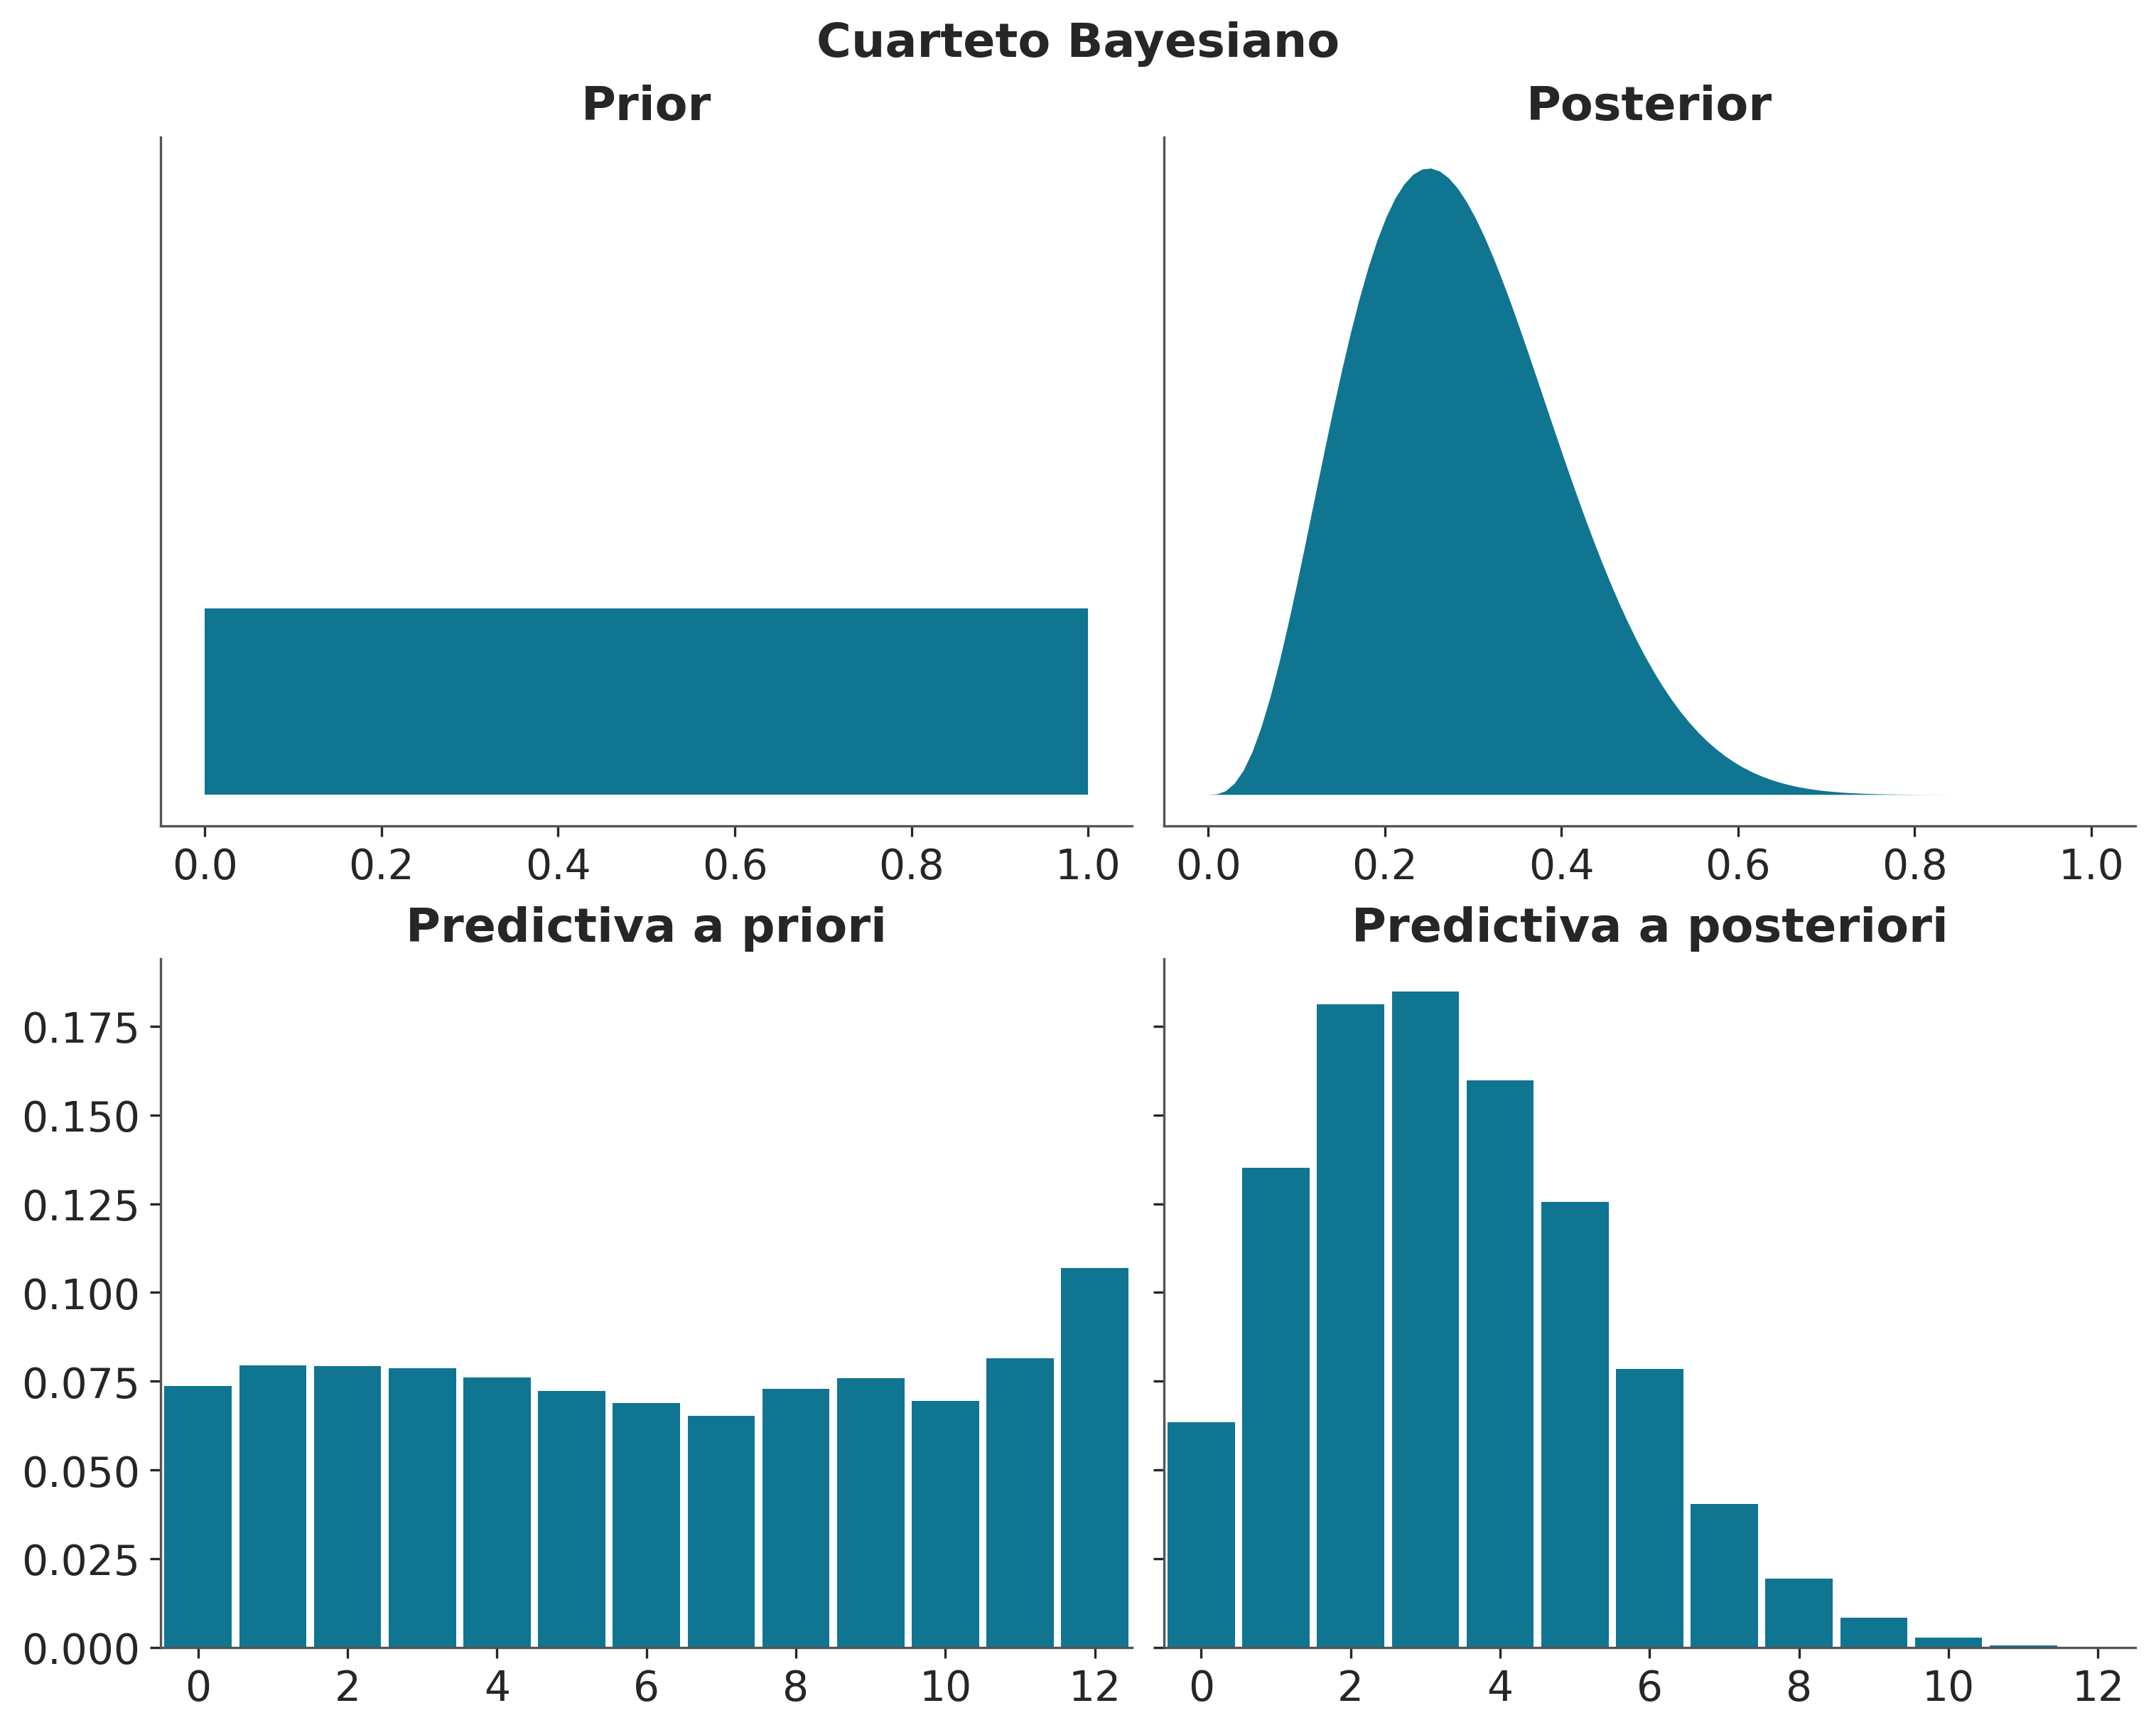

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex="row", sharey="row")
axes = np.ravel(axes)
dist = pz.Beta
a_prior = 1
b_prior = 1
N = 12
y = 3
eps = np.finfo(float).eps
x = np.linspace(eps, 1-eps, 100)


prior = dist(a_prior, b_prior).pdf(x)
axes[0].fill_between(x, 0, prior)
axes[0].set_title("Prior")
axes[0].set_yticks([])


posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
axes[1].fill_between(x, 0, posterior)
axes[1].set_title("Posterior")


prior = dist(a_prior, b_prior).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in prior])
axes[2].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[2].set_xlim(-0.5, N+0.5)  
axes[2].set_title("Predictiva a priori")

posterior = dist(a_prior + y, b_prior + N - y).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in posterior])
axes[3].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[3].set_xlim(-0.5, N+0.5)  
axes[3].set_title("Predictiva a posteriori");

fig.suptitle("Cuarteto Bayesiano", fontweight="bold", fontsize=16);

## Ejercicios

1. El estadístico Bruno de Finetti declaró que "Las probabilidades no existen". Cómo se vincula este enunciado con el modelo BetaBinomial que hemos visto?

1. Edwin Jaynes, físico, declaró que la teoría de probabilidad es la lógica de la ciencia. Discutí este enunciado.


1. Usá pz.Beta().plot_interactive() para explorar distintas combinaciones de parámetros de la distribución Beta. Cuál es el efecto de los parámetros $\alpha$ y $\beta$?

1. Interpretá los parámetros de una distribución Beta, $\alpha$ y $\beta$ en términos de su PDF (probability density function). Analizá solo el caso de $\alpha >= 1$ y $\beta >= 1$
 
1. La media de la distribución Beta es $\frac{\alpha}{\alpha+\beta}$. Cuál es la media de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. La varianza de la distribución Beta es $\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$. Cuál es la varianza de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. Contrastá los resultados de los puntos anteriores usando la función `mean` y `var` de la distribución Beta de PreliZ.

1. PreliZ tiene una función llamada [maxent](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.unidimensional.maxent). Explicá que hace.

1. Conocimiento experto indica que un parámetro debe ser positivo y que el 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

1. Conocimiento experto indica que un parámetro debe ser positivo con media 6 y 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

1. Usá la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enunciá las conclusiones que consideres más relevantes.

In [9]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…

Respuestas

1. El enunciado de "las probabilidades no existen" se relaciona con el modelo beta-binomial ya que en este, la probabilidad usada en la parte binomial "no existe" como un valor fijo, sino que debido al enfoque bayesiano, es el resultado de la parte beta. Eso es generalizable en los modelos bayesianos, ya que los parametros desconocidos (que muchas veces terminan siendo probabilidades), "no existen" en este mismo sentido (al ser desconocidos, se interpretan como el resultado de la distribucion a priori).

2. Decir que la teoria de la probabilidad es la logica de las ciencias es parcialmente cierto. Yo creo que la logica fundamental de las ciencias es, justamente, el pensamiento logico que viene de la mano de la logica proposicional. A partir de ahi, todo lo que la use de base, forma parte de las herramientas de trabajo de las ciencias.
Ahora, en el caso de la probabilidad, la considero la mas importante entre todas esas herramientas derivadas, ya que nos permite investigar y testear nuestras hipotesis sobre el mundo de una manera mas sistematizada.



In [10]:
#3.

pz.Beta().plot_interactive(pointinterval=True,)

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

3. Cuando $\alpha > \beta$ la mediana de la distribucion se "tira hacia la derecha". Cuando $\alpha < \beta$ la mediana de la distribucion se "tira hacia la izquierda". Si ambos coinciden, es una normal, donde a mayor modulo de ambos parametros, menor la varianza de la distribucion. 

4. Los parametros $\alpha$ y $\beta$ podrían ser interpretados de la siguiente manera: cada uno regula la forma de uno de los extremos de la distribucion.

5. La media de la distribución Beta es $\frac{\alpha}{\alpha+\beta}$. Cuál es la media de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

La posterior de un modelo Beta-Binomial es
$P(\theta | N,y) \propto \theta^y \cdot (1-\theta)^{N-y} \cdot \theta^{a-1} \cdot (1-\theta)^{b-1} \propto \theta^{y+a-1} \cdot (1-\theta)^{N-y+b-1} \propto Beta(y+a-1,N-y+b-1)$

En este caso, es una Beta(6+2-1,10-6+5-1) = Beta(7,8). Por lo que su media es $\frac{7}{7+8}$ = 0.466

6. La varianza del posterior beta-binomial anterior es $\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$ =  $\frac{7 * 8}{(7+8)^2(7+8+1)}$ = 0.0155

7.

In [11]:
#7
posterior_ejercicio = pz.Beta(7,8)
print(posterior_ejercicio.mean(),posterior_ejercicio.var())

0.4666666666666667 0.015555555555555555


Que grande jaja

8.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 1.5138315766085384
        x: [ 4.358e+01  4.358e+01]
      nit: 3
      jac: [ 5.665e-03  5.657e-03]
     nfev: 9
     njev: 3)

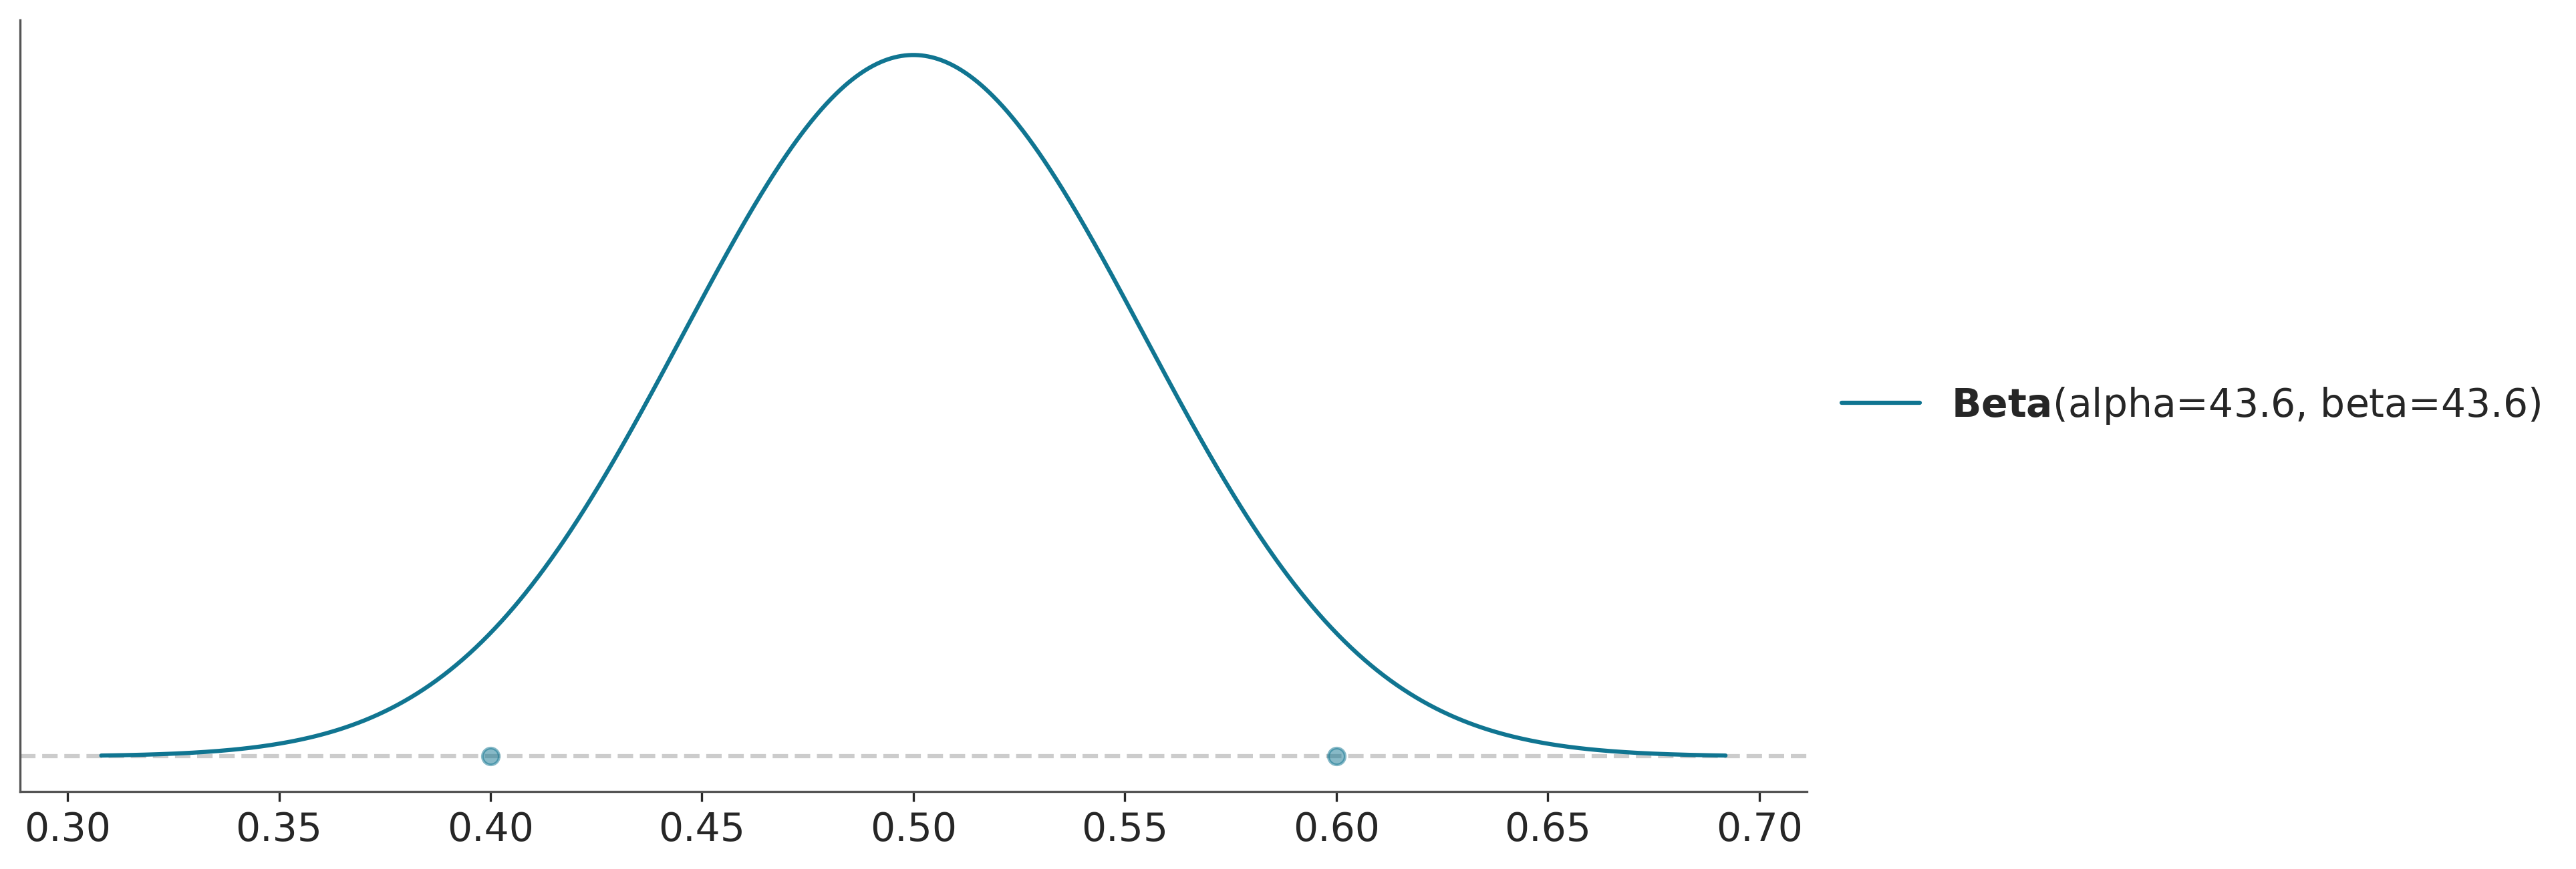

In [12]:
#8
pz.maxent(pz.Beta(),0.4,0.6)

Despues de leer la documentacion y la definicion de distribucion de maxima entropia, puedo decir que la funcion maxent devuelve la distribucion de maxima entropia (es decir, dada una familia de distribuciones, es aquella distribucion que menos informacion aporta), a partir de un intervalo de credibilidad "mass", definido por sus limites superior e inferior (upper y lower). Esto puede ser muy util en casos donde quiero usar un prior levemente informativo (o sea, defino una familia de distribucion pero no se nada mas).

9. Conocimiento experto indica que un parámetro debe ser positivo y que el 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: -2.995732147194149
        x: [ 1.000e+00  2.100e+01]
      nit: 3
      jac: [ 5.000e-02 -5.000e-02]
     nfev: 9
     njev: 3)

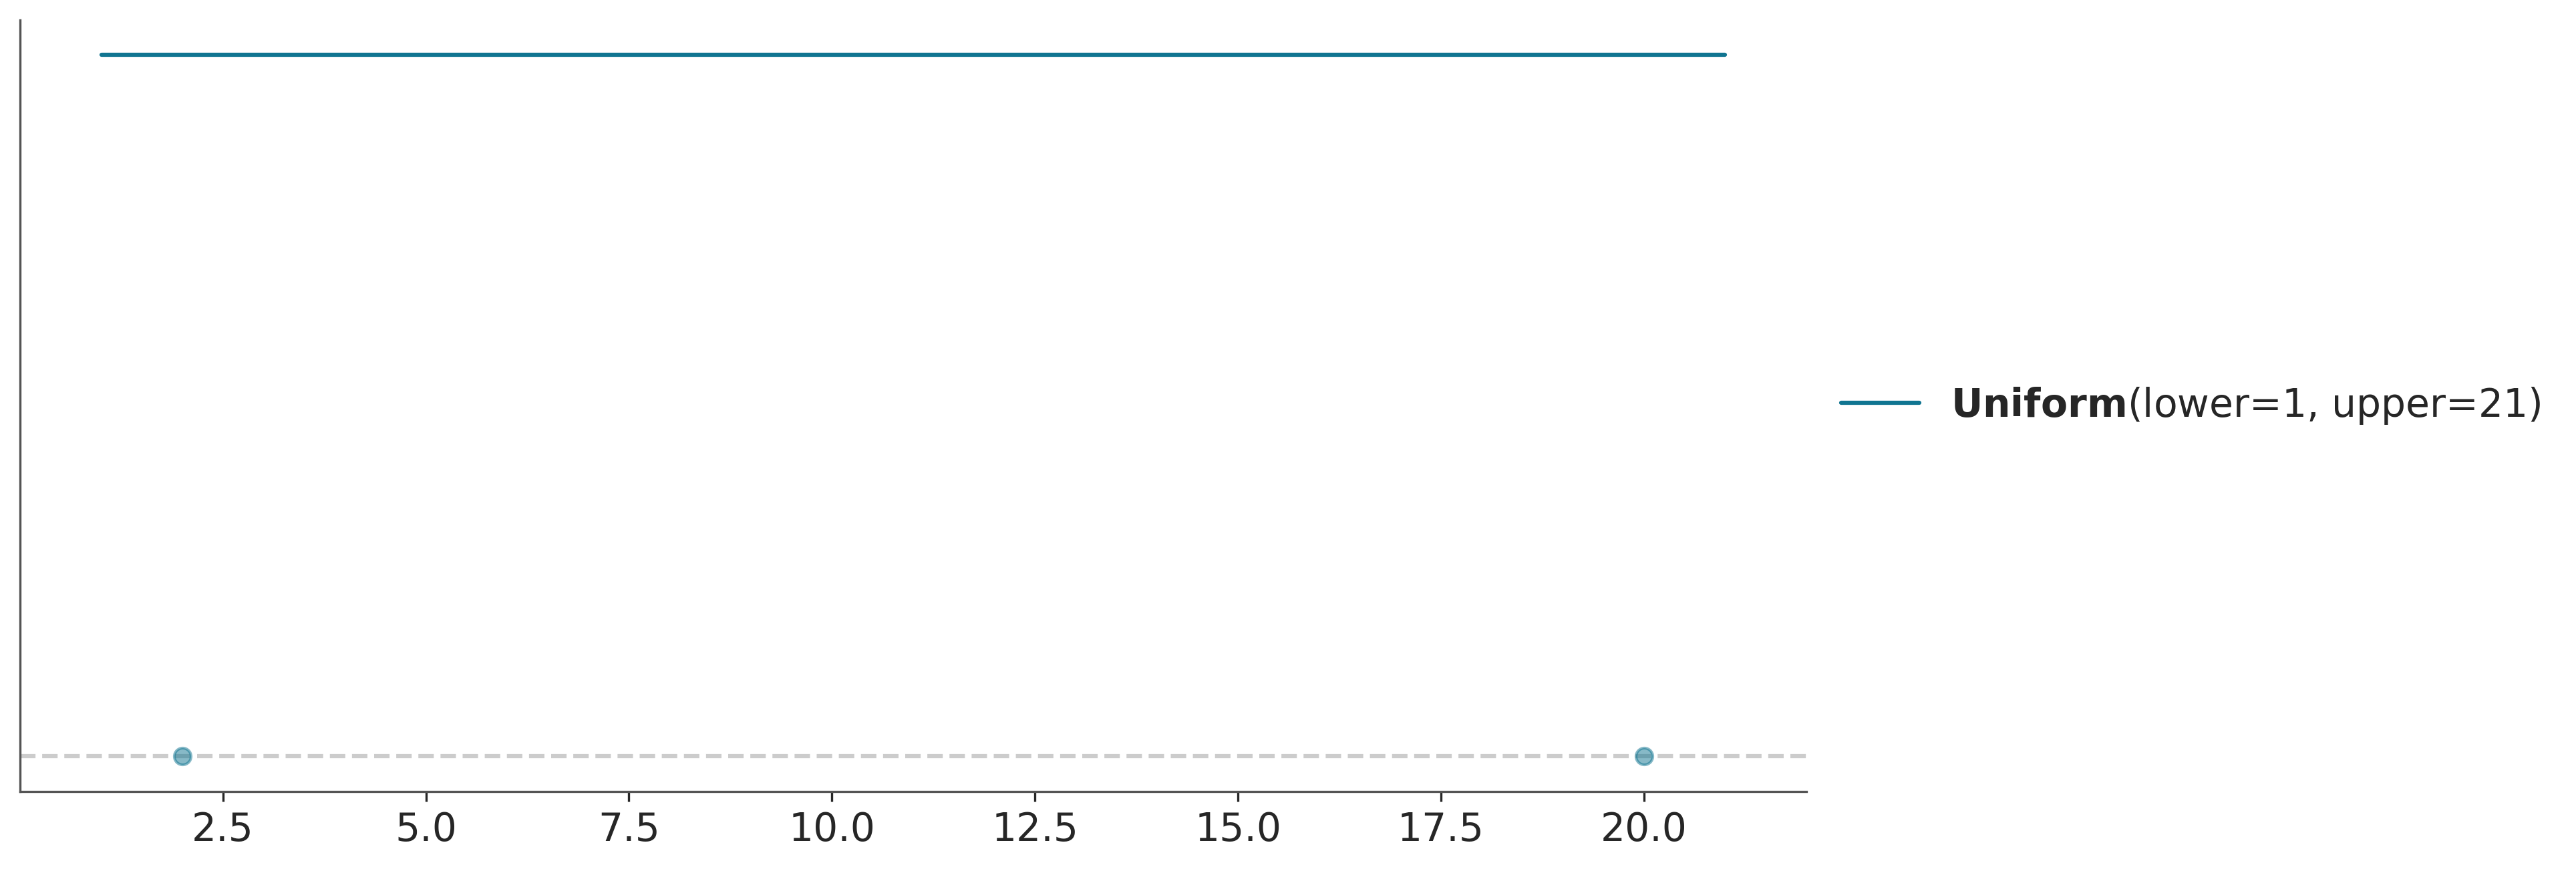

In [13]:
#Ejemplo: no sabia cual usar, use la Uniforme
pz.maxent(pz.Uniform(),2,20,mass=0.9)

c:\Users\admin\Desktop\unsam\Ciencia_de_Datos\Estadistica e Inferencia 2\estadistica_e_inferencia_II\.venv\Lib\site-packages\preliz\internal\distribution_helper.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  precision = 1 / sigma**2
 The requested mass is 0.9, but the computed one is 0.798


(<Axes: >,
  message: Iteration limit reached
  success: False
   status: 9
      fun: -2.952907335443703
        x: [ 9.273e+00]
      nit: 100
      jac: [-1.078e-01]
     nfev: 1126
     njev: 100)

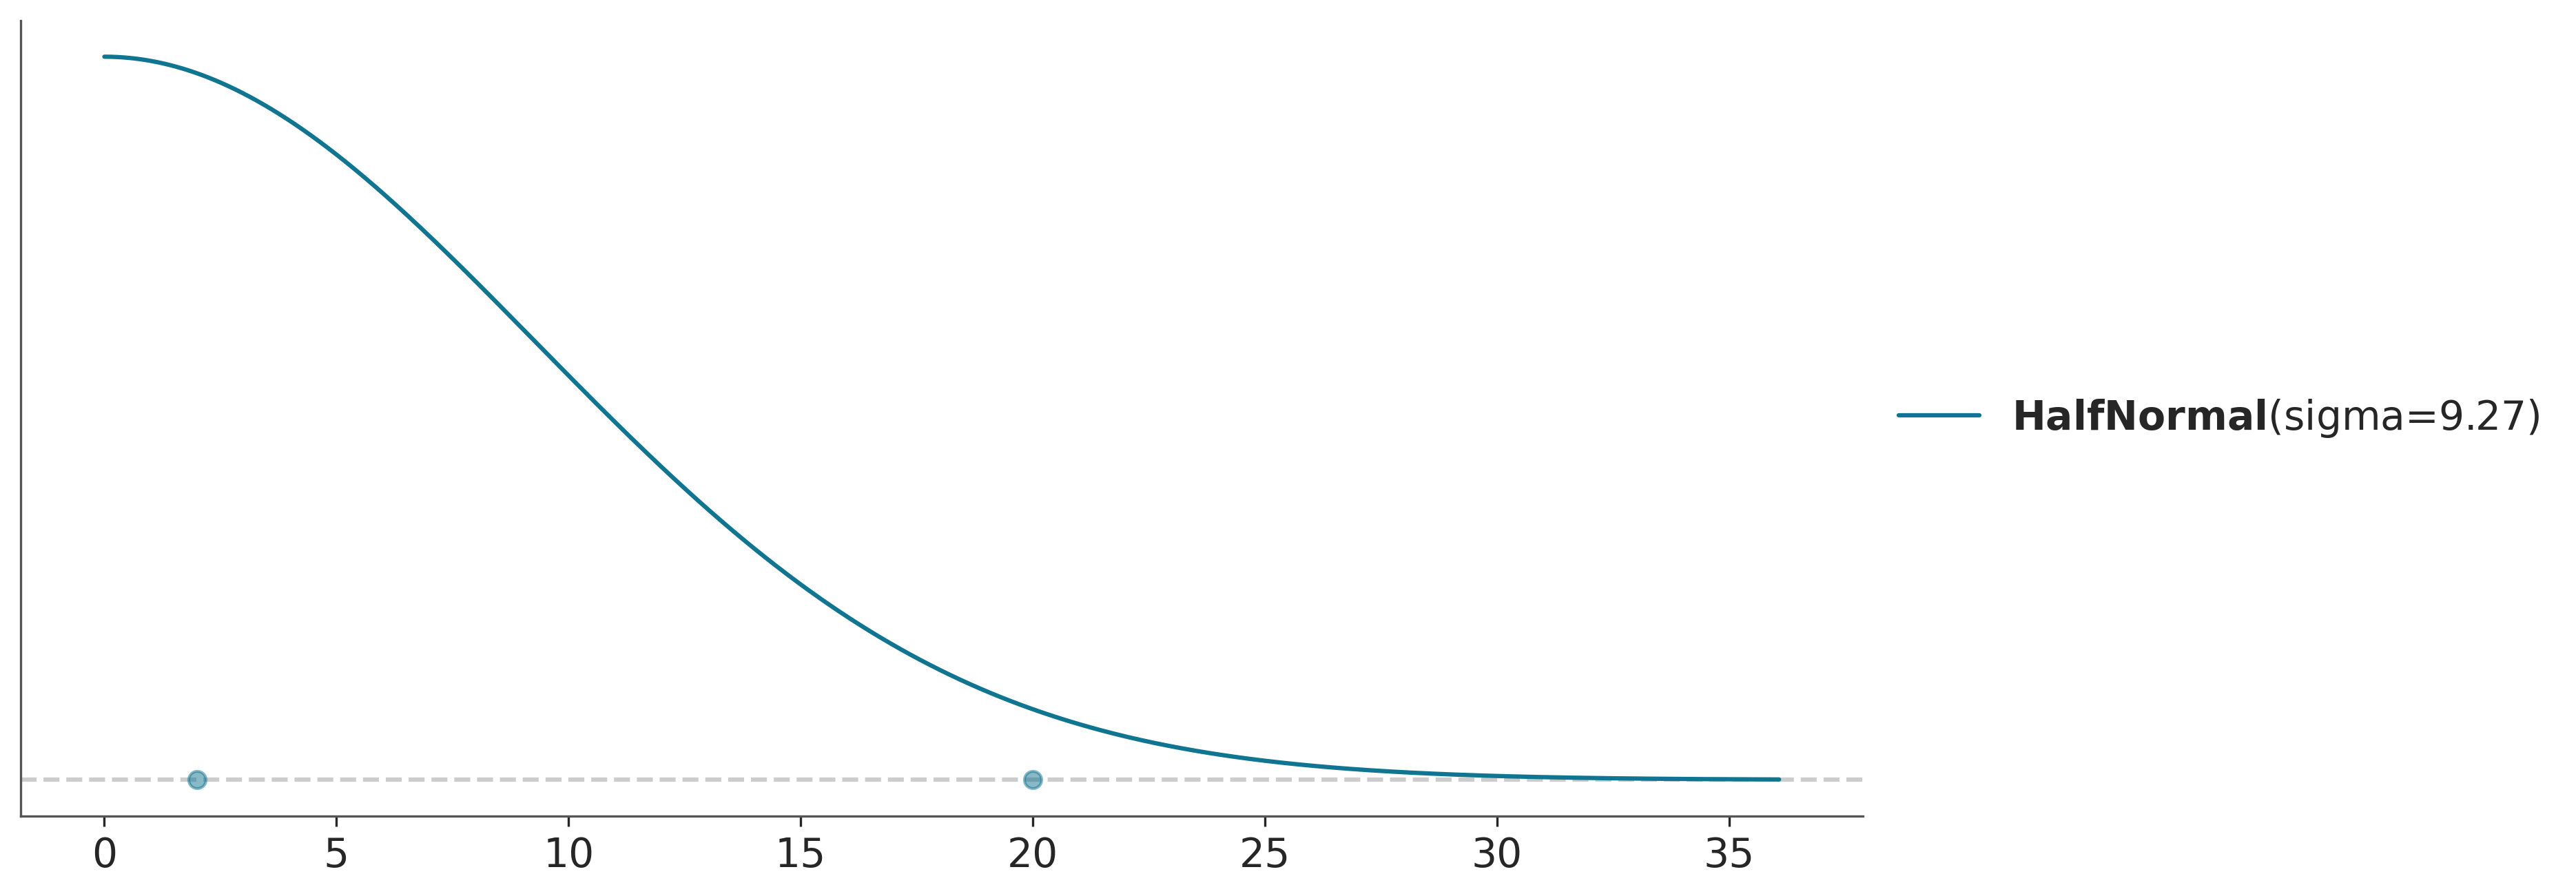

In [14]:
pz.maxent(pz.HalfNormal(),2,20,mass=0.9)

Habia probado con HalfNormal y tiraba un warning de que usaba mass=0.798

10.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: -2.58042165910443
        x: [ 3.660e+00]
      nit: 4
      jac: [-1.923e-01]
     nfev: 8
     njev: 4)

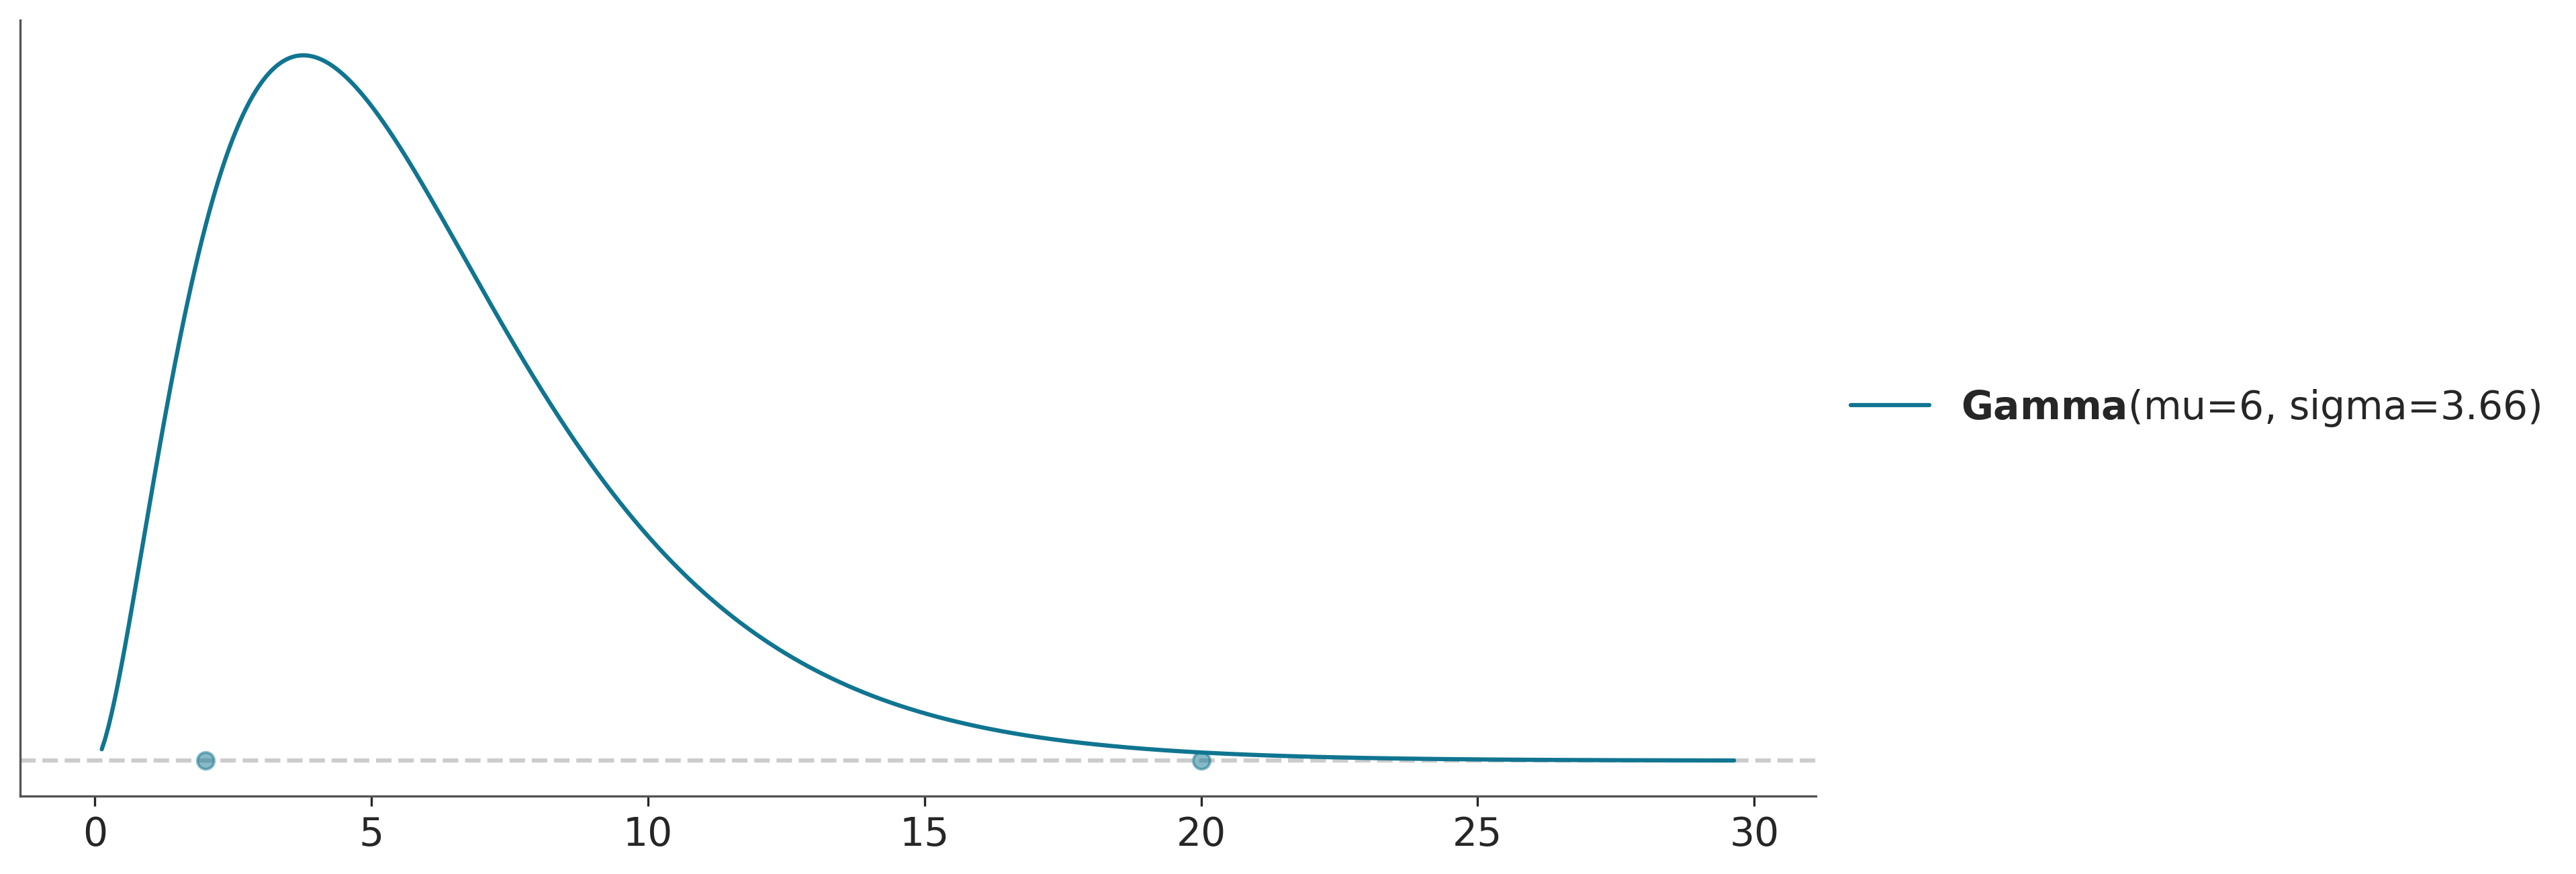

In [15]:
#10 - Uso la distribucion Gamma porque tiene dominio positivo y puedo usar el parametro mean.
pz.maxent(pz.Gamma(mu=6),2,20,mass=0.9)

11.

In [16]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…

Conclusiones:
- A mayor cantidad de datos, la likelihood obtiene mas importancia (peso) por sobre el prior, haciendo que la posterior la obedezca mas.
    - Ejemplo: a= 7 b =1 hacen prior exponencial en 1. caras 1 y vamos agregando tiradas progresivamente. Al inicio, c=1 t=1 nos da una posterior identica al prior. A medida que agrego mas tiradas, la likelihood se va mas hacia la izquierda, haciendo que compita con el prior. Esto hace que la posterior se vaya moviendo cada vez mas hacia la izquierda (como la likelihood, hacia donde van los datos!!)
- Para este caso Beta-Binomial, al igualar a y b nos da una normal con media 0.5. Mientras mayor sea su modulo, menor varianza va a tener.
- Ademas, lo que hace que vaya para un lado o para el otro con mas fuerza es la diferencia entre a y b. Mientras mayor sea esta diferencia, el prior va a tirarse mas para el lado del parametro mayor (a derecha, b izquierda)

Notas de clase 4 sobre ejercicios
- La idea era ver que no es todo tan automatico y por otro lado, acostumbrarnos a buscar la documentacion.

Tema seleccion de distribucion del 9 y 10:
- Hay distintas escuelas de pensamiento:
    - Escuela Perspectiva Objetiva: Prior menos informativo posible. Sirve para casos muy simples, en general hay alguna dependencia con la likelihood. Muy relacionado al prior conjugado.
    - Escuela Perspectiva ____ : Prior en funcion del problema y dominio de negocio. No da soluciones rapidas, es un gran DEPENDE. Muchas veces sale la HalfNormal, HalfCauchy (cola mas pesada, no tan sesgado, pero malo computacionalmente), Practicas comunes, si es positivo, No elijo una Normal!!

En este curso vamos con la segunda, es un gran depende, mucha practica. Lo importante es que cumpla con mis requerimientos.
En el 9 y 10 podria haber sido HalfNormal 

Guarda con la Uniforme, solo sirve si fisicamente el parametro tiene esa restriccion!!
En el caso del 9 es mejor la HalfNormal.

Comentarios del profe:

Lo de la probabilidad como logica de las ciencias, es que la probabilidad es una extension de la logica, donde 0 y 1 son casos particulares...

El 4. tenia como objetivo hacer analisis matematico de la PDF de la distribucion Beta. REHACER





In [17]:
print(112/1.58)
print(86/0.99)

70.88607594936708
86.86868686868686
